# Diamond Price Prediction

This dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.
This is a regression problem ie. the target values are continous

Our goal here is to build a model with best r2 score and predict the best price.

<b><u>Feature description:   </b></u>

* <font color='red' ><b>price </font > </b>-  price in US dollars 

* <font color='red' ><b>carat </font></b>- The carat is the diamond’s physical weight measured in metric carats

* <font color='red' ><b>cut </font></b>- The more precise the diamond is cut, the more captivating the diamond is to the eye.  

* <font color='red' ><b>color</font></b> - The colour of gem-quality diamonds occurs in many hues,Colourless diamonds are the rarest.

* <font color='red' ><b>clarity </font></b>- Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes.


<u><b>Dimensions</b></u>

  *  <font color='red' >x = length in mm </font>

  * <font color='red' >y = width in mm </font>

  *  <font color='red' >z = depth in mm </font>



* <font color='red' ><b>depth total depth percentage</b></font> = z / mean(x, y) * 100

* <font color='red' ><b>table width</b></font>


# Importing all necessary dependancies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [4]:
# loading the data using pandas 

df = pd.read_csv('diamonds.csv')
df.head(1)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [5]:
df = df.iloc[:,1:] #dropped the column Unnamed

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.shape  #checking the num of rows and cols
#each row represents a diamond and its specification

(53940, 10)

# Pre-processing

In [8]:
df.info()   #3 object-type, 1 int, 6 float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
df.isna().sum()   #checking nulls

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
df.describe()    #checking the statistical features

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
#here we found the minimum values of x,y,z is 0 which is nearly impossible for a dimension.

# we can drop the points where x,y,z == 0 

df = df[df.x > 0.0]
df = df[df.y > 0.0]
df = df[df.z > 0.0]

In [13]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [14]:
df.shape   #20 rows were dropped in the process

(53920, 10)

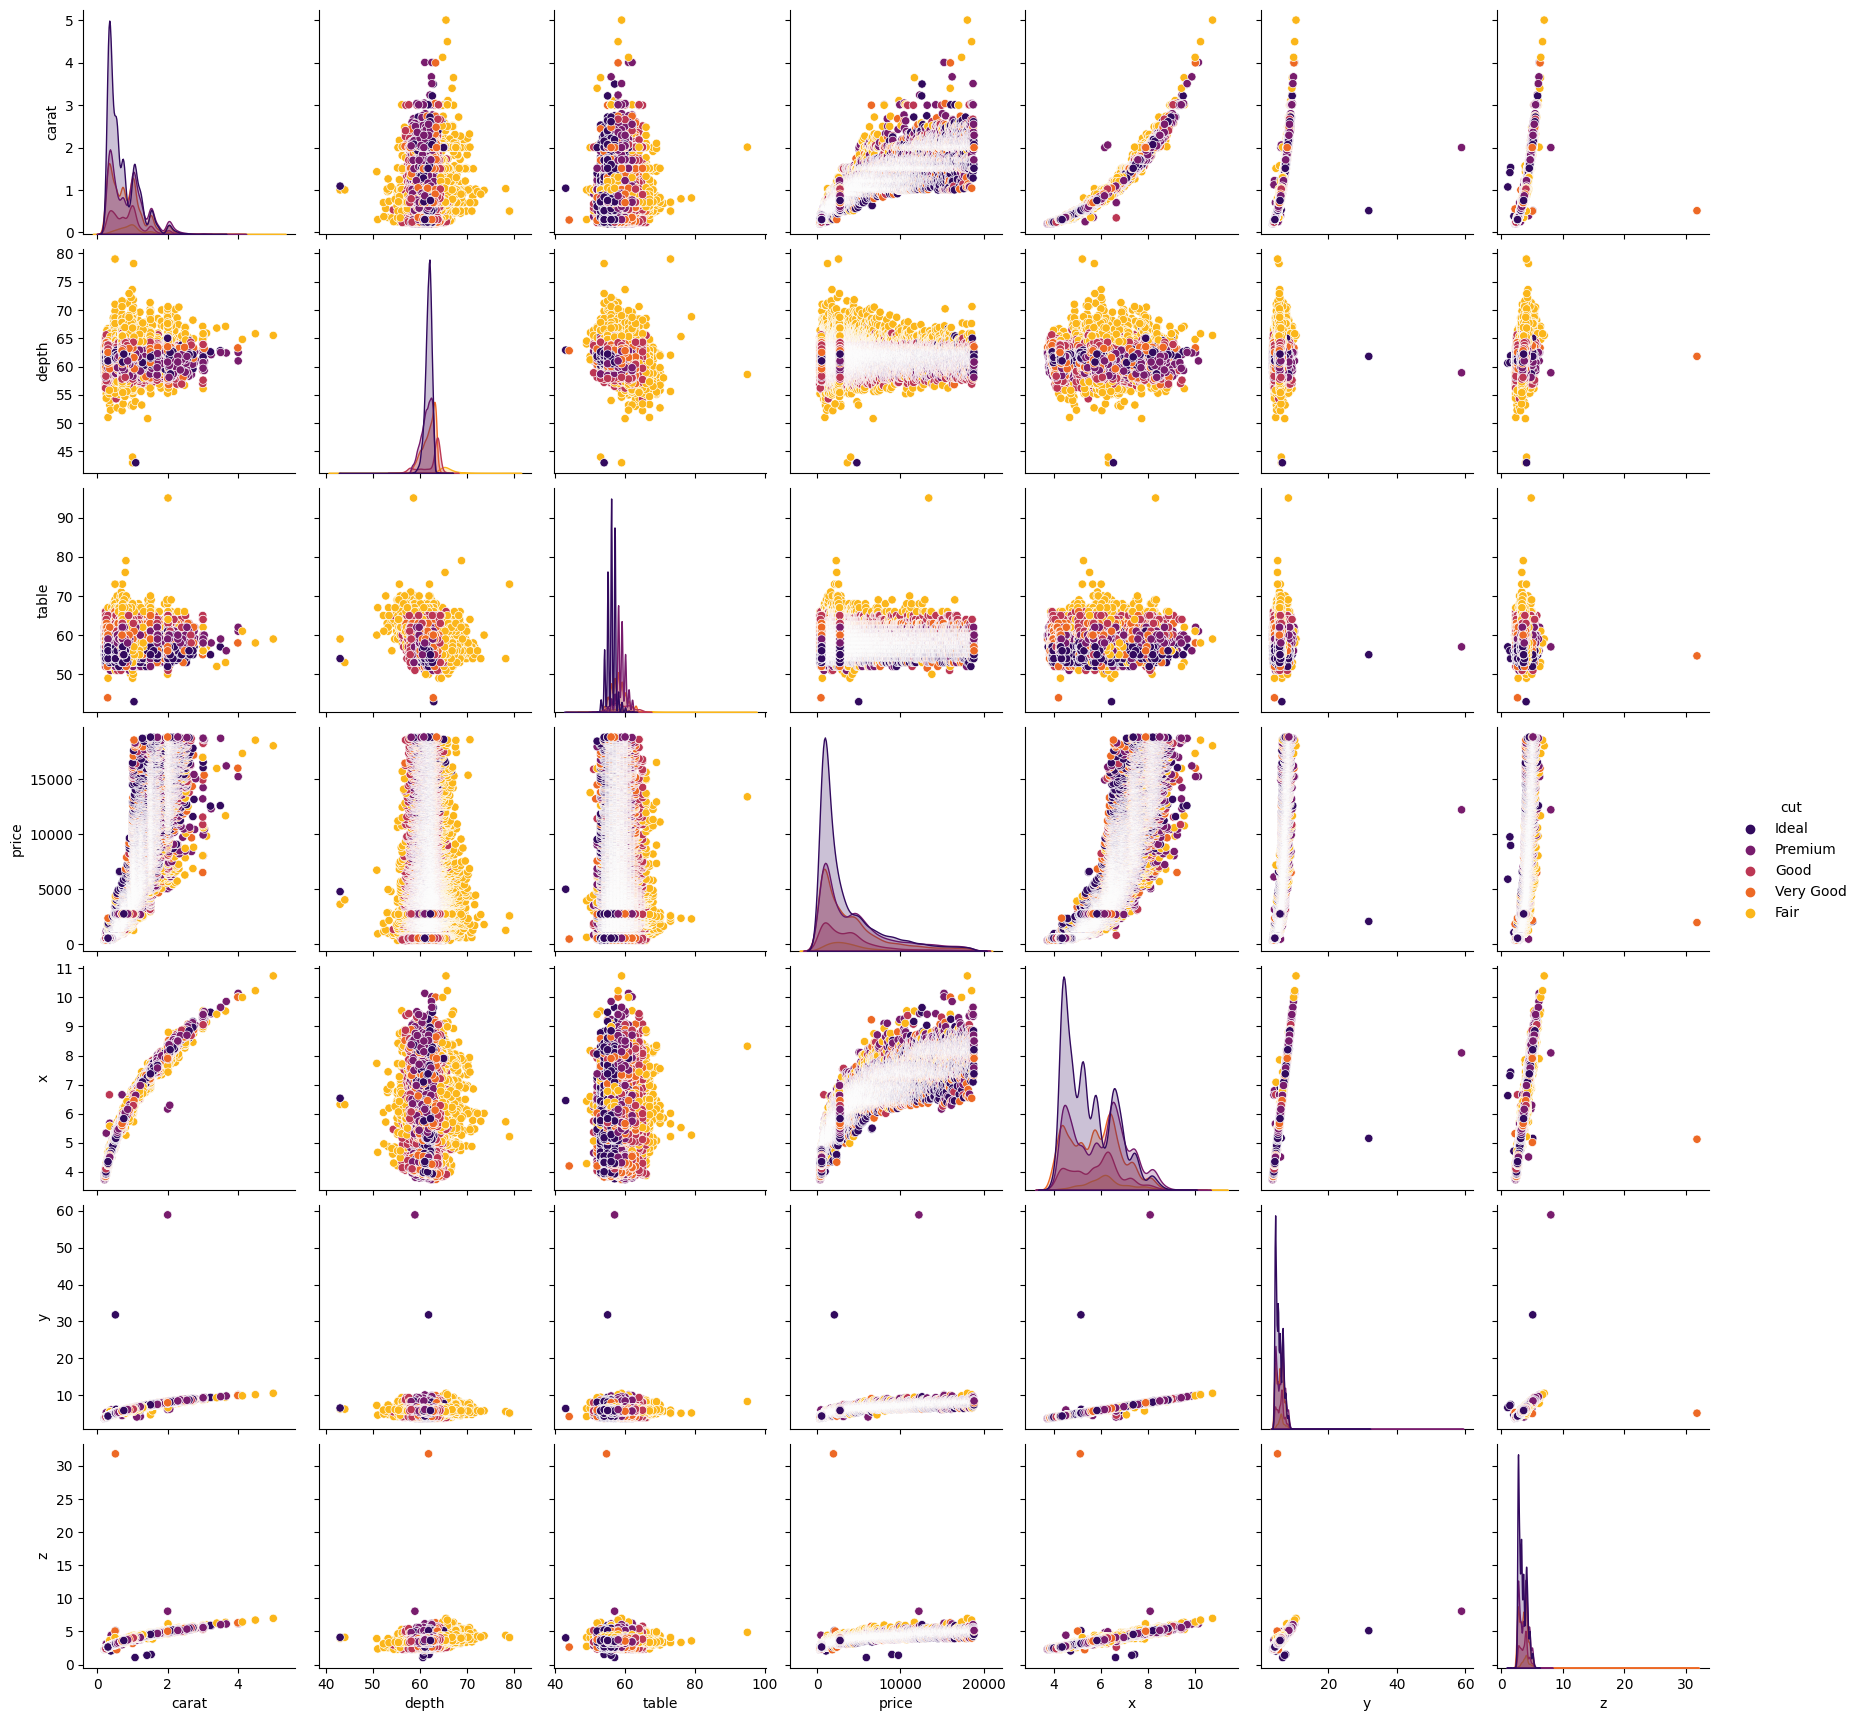

In [12]:
# plotting the pair plot using seaborn 

sb.pairplot(df,hue='cut',palette='inferno')    #we are provoding the feature 'cut' as hue

<font color='red'>From the pair plot, it is evident that there are several outliers in the data. 
To view the price column specifically, I plotted a regression plot using Seaborn. 
The regplot plots a scatterplot and fits a best fit line (regression line) to the data.</font>


In [15]:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


<AxesSubplot: xlabel='price', ylabel='depth'>

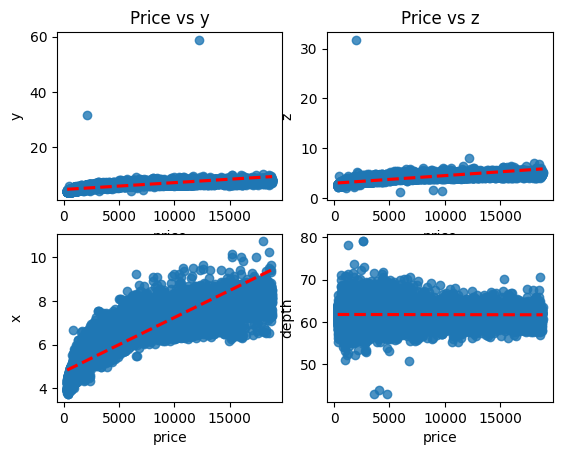

In [15]:
# plotting the regression plot using seaborn

plt.subplot(2,2,1)     #Price vs y
plt.title('Price vs y')
sb.regplot(x='price',y='y',data=df,line_kws={'color': 'red', 'linestyle': 'dashed'})

plt.subplot(2,2,2)      #Price vs z
plt.title('Price vs z')
sb.regplot(x='price',y='z',data=df,line_kws={'color': 'red', 'linestyle': 'dashed'})



plt.subplot(2,2,3)       #Price vs x
# plt.title('Price vs x')
sb.regplot(x='price',y='x',data=df,line_kws={'color': 'red', 'linestyle': 'dashed'})

plt.subplot(2,2,4)        #Price vs depth
# plt.title('Price vs depth')
sb.regplot(x='price',y='depth',data=df,line_kws={'color': 'red', 'linestyle': 'dashed'})

<AxesSubplot: title={'center': 'Price vs y'}, xlabel='price', ylabel='table'>

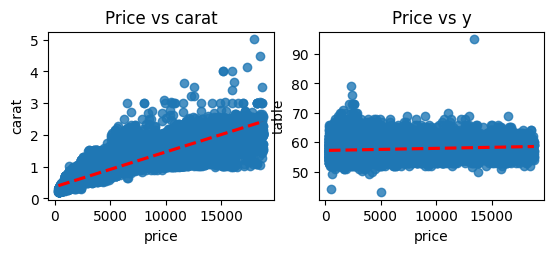

In [16]:
plt.subplot(2,2,1)         #Price vs carat
plt.title('Price vs carat')
sb.regplot(x='price',y='carat',data=df,line_kws={'color': 'red', 'linestyle': 'dashed'})

plt.subplot(2,2,2)       #Price vs y
plt.title('Price vs table')
sb.regplot(x='price',y='table',data=df,line_kws={'color': 'red', 'linestyle': 'dashed'})

<font color='red'>The plot shows that outliers can cause difficulties in model creation. To address this, I set up threshold values, and any values above these are considered outliers.</font>


In [16]:
# removing the outliers
df = df[df['y']<30]     #dropping values of y greater than 30

In [17]:
df = df[(df['z']<30) & (df['z'] >2)]    #dropping values of z greater than 30 and less than 2 

In [18]:
df = df[(df['depth'] < 75) & (df['depth'] > 45)]  #dropping depth greater than 75 and less than 45

In [19]:
df = df[df['x']<30]     #droping greater than 30

In [20]:
df = df[(df['table']<80) & (df['table']>40)]       #dropping table column above 80 and below 40

In [21]:
df.shape   

(53907, 10)

In [22]:
# visualization of regression plot after removing major outliers

<AxesSubplot: xlabel='price', ylabel='depth'>

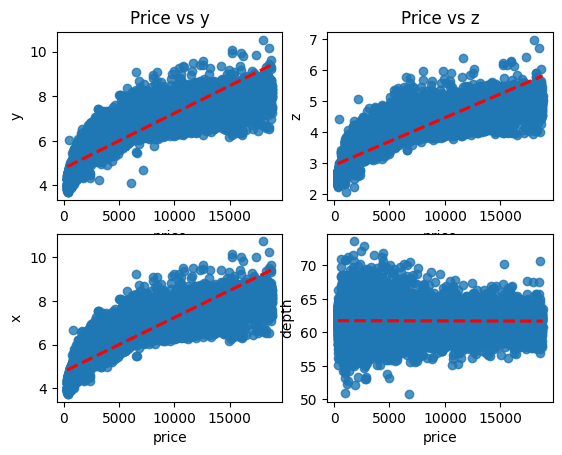

In [26]:
plt.subplot(2,2,1)
plt.title('Price vs y')
sb.regplot(x='price',y='y',data=df,line_kws={'color': 'red', 'linestyle': 'dashed'})

plt.subplot(2,2,2)
plt.title('Price vs z')
sb.regplot(x='price',y='z',data=df,line_kws={'color': 'red', 'linestyle': 'dashed'})



plt.subplot(2,2,3)
# plt.title('Price vs x')
sb.regplot(x='price',y='x',data=df,line_kws={'color': 'red', 'linestyle': 'dashed'})

plt.subplot(2,2,4)
# plt.title('Price vs depth')
sb.regplot(x='price',y='depth',data=df,line_kws={'color': 'red', 'linestyle': 'dashed'})

<font color='red'>Visualizing the pair plot and comparing it with the old plot shows that removing outliers resulted in a linear distribution of points in the data.</font>


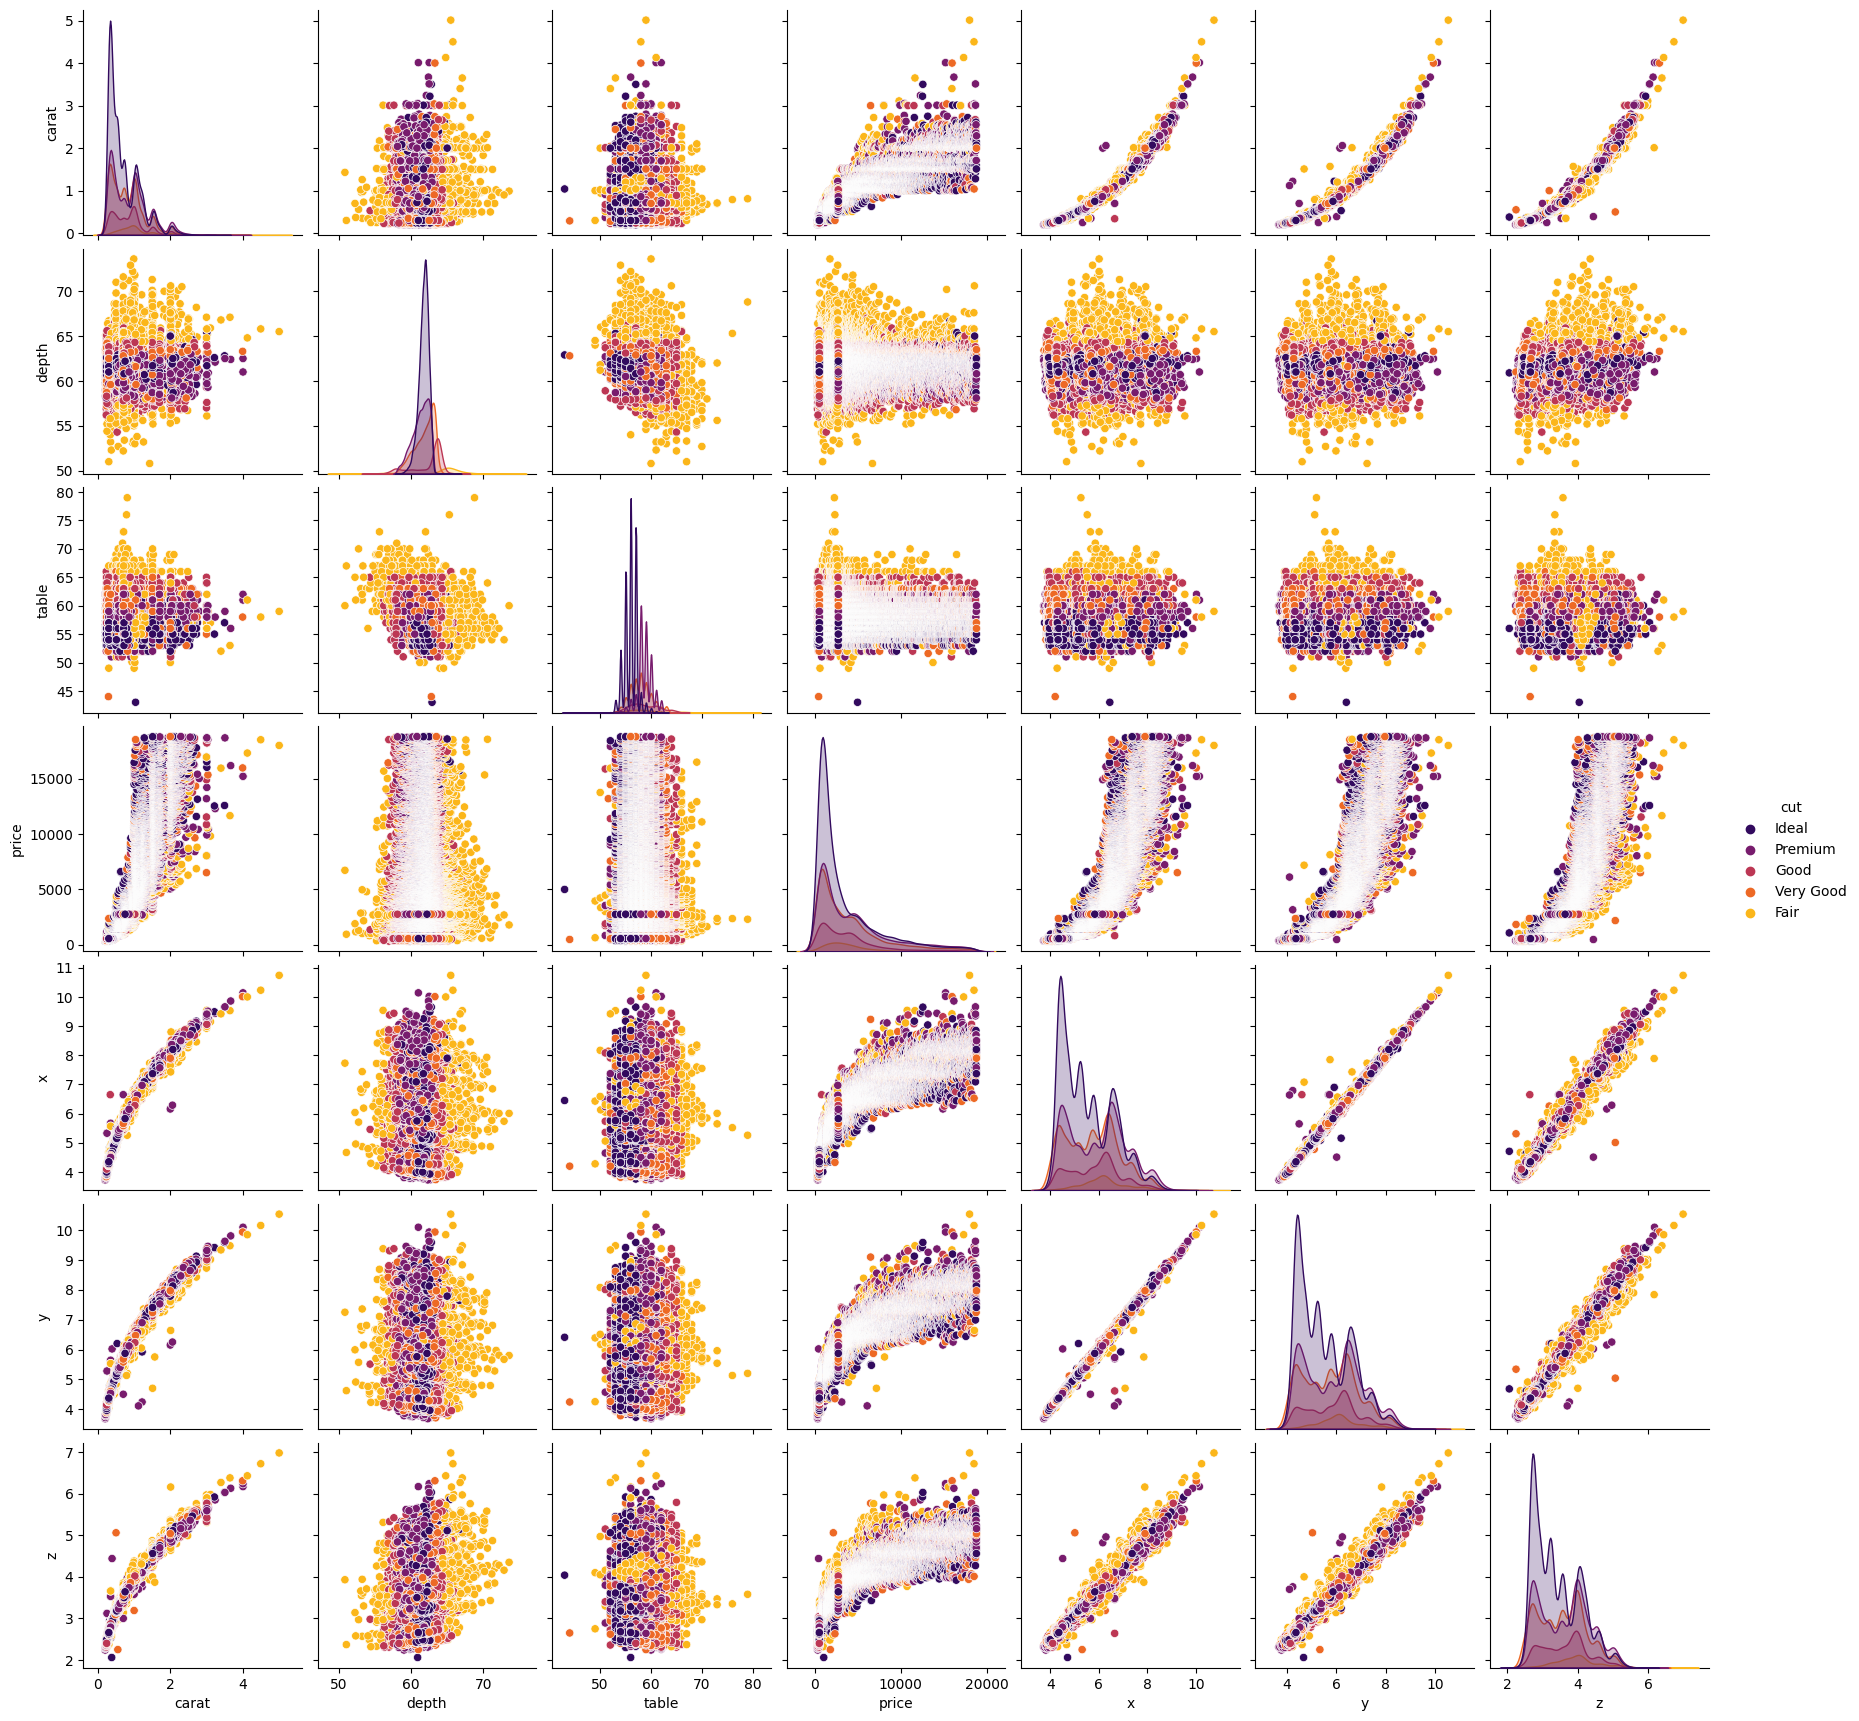

In [27]:
sb.pairplot(df,hue='cut',palette='inferno')

In [23]:
# viewing the unique values of different categorical columns using for loop

for i in df.select_dtypes(object).columns:     #this will select only object type data from the main dataframe df
    print(i)                                   #this will print the name of feature
    print(df[i].unique())                      #this will print the unique values in each feature
    print('___________')                       # to seperate different features

cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
___________
color
['E' 'I' 'J' 'H' 'F' 'G' 'D']
___________
clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
___________


<AxesSubplot: xlabel='cut', ylabel='price'>

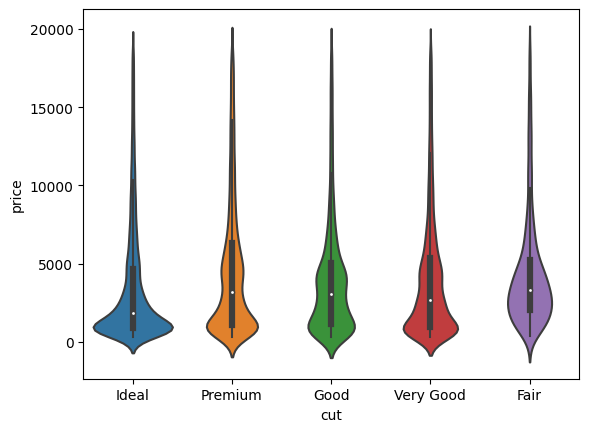

In [24]:
# comparing the distribution of different variables of categorical features 

sb.violinplot(x='cut',y='price',data=df)    #plotting the violin plot for different cuts

<AxesSubplot: xlabel='color', ylabel='price'>

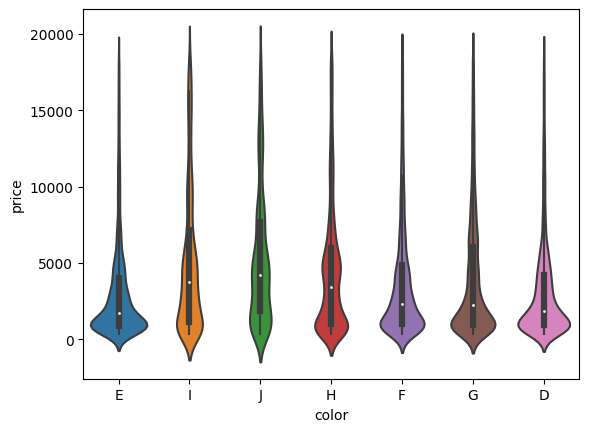

In [30]:
sb.violinplot(x='color',y='price',data=df)    #visualizing different categorical values within color feature

<AxesSubplot: xlabel='clarity', ylabel='price'>

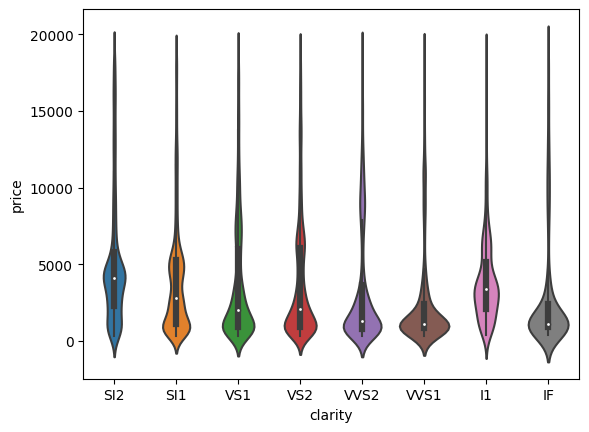

In [31]:
sb.violinplot(x='clarity',y='price',data=df)    #visualizing different categorical values within clarity feature

In [25]:
# dummy encoding the categorical data using pandas get dummies

df1 = pd.get_dummies(columns=['cut','color','clarity'],data=df,drop_first=True)

df1.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


<AxesSubplot: >

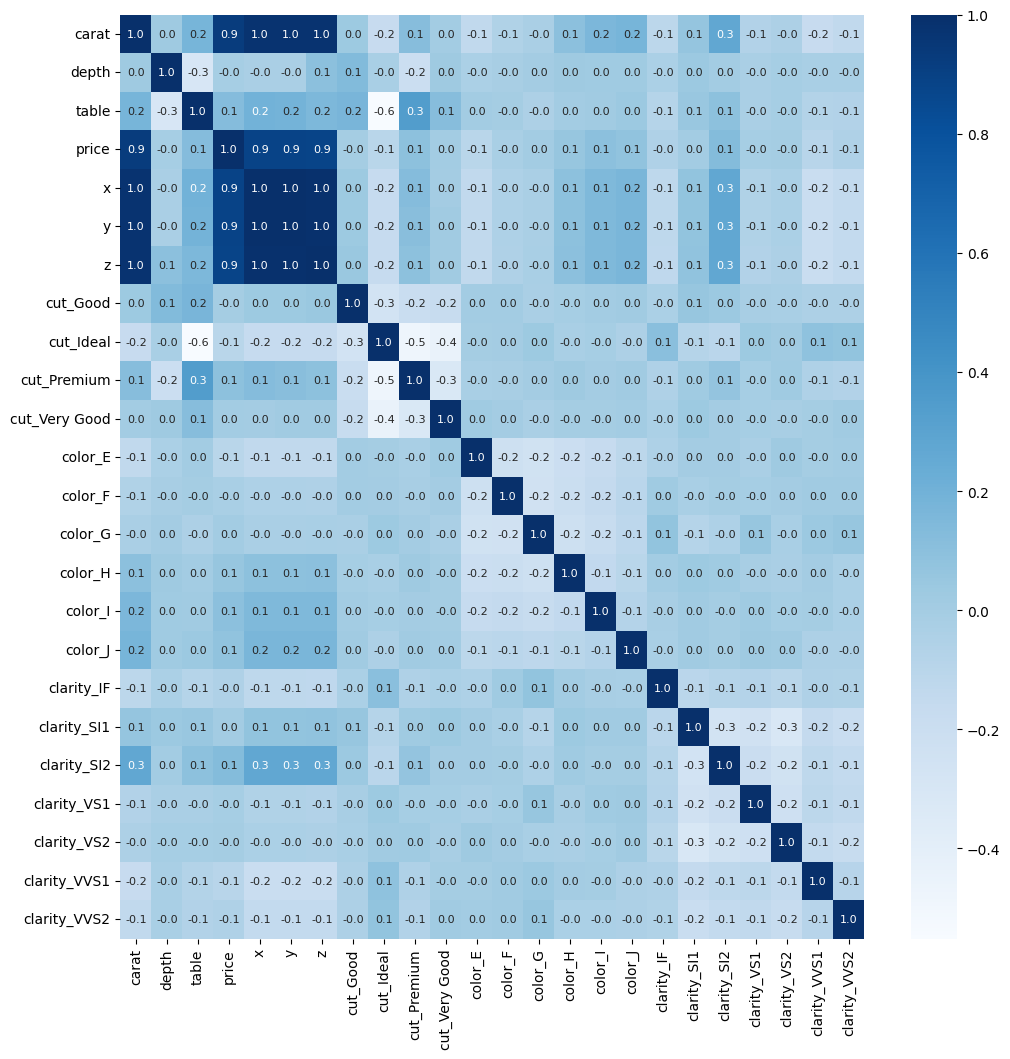

In [33]:
# plotting the heat_map and analysing the correlation
plt.figure(figsize=(12,12))
sb.heatmap(df1.corr(),annot=True,annot_kws={'size':8},fmt='.1f',cmap='Blues')

<font color='red'>The features x, y, z, and carat have a high correlation with the target (price), while depth and table have a low correlation with price.</font>


In [35]:
df1.info()
# now every feature and target is converted into the numeric form

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53907 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53907 non-null  float64
 1   depth          53907 non-null  float64
 2   table          53907 non-null  float64
 3   price          53907 non-null  int64  
 4   x              53907 non-null  float64
 5   y              53907 non-null  float64
 6   z              53907 non-null  float64
 7   cut_Good       53907 non-null  uint8  
 8   cut_Ideal      53907 non-null  uint8  
 9   cut_Premium    53907 non-null  uint8  
 10  cut_Very Good  53907 non-null  uint8  
 11  color_E        53907 non-null  uint8  
 12  color_F        53907 non-null  uint8  
 13  color_G        53907 non-null  uint8  
 14  color_H        53907 non-null  uint8  
 15  color_I        53907 non-null  uint8  
 16  color_J        53907 non-null  uint8  
 17  clarity_IF     53907 non-null  uint8  
 18  clarit

In [36]:
df1.shape

(53907, 24)

<font color='red'>We successfully completed pre-processing and saved the data as cleaned data. 
This data will be used to build the model.</font>


In [26]:
df1.to_csv('cleaned_data')

# Model building

In [27]:
# Importing the cleaned data using pandas 

data = pd.read_csv('cleaned_data')

In [28]:
data = data.iloc[:,1:]

In [29]:
data.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [30]:
# splitting the data into features and target

X = data.drop('price',axis=1)
y = data['price']

In [31]:
# splitting into X_train and y_train
# 67 % - train_data #33 % - test_data 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=2)

In [32]:
# building the ml pipeline for different models to  fit

In [33]:
# linear_regression


pipeline_lin_reg = Pipeline([
    ('Standardization',StandardScaler()),     #first step standard scalar
    ('lr',LinearRegression())                 #second step Linear regression
])

In [34]:
pipeline_lin_reg

Pipeline(steps=[('Standardization', StandardScaler()),
                ('lr', LinearRegression())])

In [35]:
# decision_tree

pipeline_dt = Pipeline([         
    ('dt',DecisionTreeRegressor())             
])

In [36]:
# random_forest

pipeline_rf = Pipeline([
    ('rf',RandomForestRegressor())
])

In [37]:
# Knn

pipeline_knn = Pipeline([
    ('Standardization',StandardScaler()),
    ('knn',KNeighborsRegressor())
])

In [38]:
# Ada_boost

pipeline_ada = Pipeline([
    ('ada',AdaBoostRegressor())
])

In [39]:
# xgboost

pipeline_xgb = Pipeline([
    ('xgb',XGBRFRegressor())
])

In [40]:
# creating a list of different ml pipelines

pipe = [pipeline_ada,pipeline_dt,pipeline_knn,pipeline_lin_reg,pipeline_rf,pipeline_xgb]

In [41]:
#  creating a dixtionary of the pipeline's corresponding with their model name
pipe_dict = {0:'Ada_boost',1:'Decision_tree',2:'knn',3:'linear_reg',
       4:'Random_forest',5:'xgboost'}

In [42]:
# function to find best cross val score
# defining a function for finding best cross validation score
def best_cv_score(xtr,ytr):
    dict = {}
    for i,model in enumerate(pipe):
        cv_score = cross_val_score(model,xtr,ytr,cv=5,n_jobs=-1,scoring='r2')
        best_cv = cv_score.mean()
        dict[pipe_dict[i]] = (f'{round(best_cv * 100,2)}%')
    cv_df = pd.DataFrame(dict,index=['cv_score'])
    return cv_df
        

In [43]:

best_cv_score(X_train,y_train)

,Ada_boost,Decision_tree,knn,linear_reg,Random_forest,xgboost
cv_score,85.91%,95.03%,94.77%,91.99%,97.23%,92.82%


* I find the best params for RF using cv


* The model with highest cross_vsl score is <font color='red'><b>Random forest </font></b>


# Hyper_parameter tuning

In [44]:
# storing different parametes of random forest as a dictionary
params = {
    'n_estimators': [50,100,150],
    'max_depth' : [1,2,3,4],
    'min_samples_split': [1,2,3],
    'min_samples_leaf' : [1,2],
    'max_leaf_nodes' : [None,1,2,3]}

In [45]:
# defing a function that will return te best params and score of Random Forest algorithm
def best_hyp_params(xtr,ytr,model,pm):
    dict = {}
    hyp = GridSearchCV(model,pm,cv=5,n_jobs=-1,scoring='r2')
    hyp.fit(xtr,ytr)
    dict['Best_score'] = f'{round(hyp.best_score_*100,2)}%'
    
    df = pd.DataFrame(dict,index=['Best_score'])
    print(f'Best Params : {hyp.best_params_}')
    print('_____________________')
    return df
    

In [46]:
best_hyp_params(X_train,y_train,RandomForestRegressor(),params)

Best Params : {'max_depth': 4, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
_____________________


,Best_score
Best_score,89.97%


In [47]:
# fitting these bet params to the original pipeline
pipeline_rf = Pipeline([
    ('rf',RandomForestRegressor(max_depth=None,max_leaf_nodes=None,min_samples_leaf=1,min_samples_split=2,n_estimators=100))
])

In [48]:
pipeline_rf.fit(X_train,y_train)

Pipeline(steps=[('rf', RandomForestRegressor())])

In [49]:
# predicted output
y_pred = pipeline_rf.predict(X_test)

In [50]:
# comparison of original output to predicted output
pd.DataFrame({'y_test':y_test,'y_pred':y_pred}).sample(5)

,y_test,y_pred
42402,1313,1331.40
24301,12566,12210.90
1470,2982,3232.15
23116,11154,10708.63
31302,759,746.13


# Model metric scores

In [51]:
 
#     the different scores
scores = {"R^2":f'{round(r2_score(y_test,y_pred)*100,3)}%', #r2 score
"MAE":round(mean_absolute_error(y_test,y_pred),2),      #Mean_absolute_error
"MSE":round(mean_squared_error(y_test,y_pred),2),       #Mean_Squared_error
"RMSE":round(np.sqrt(mean_squared_error(y_test,y_pred)),2)}  #Root_mean_squared_error

pd.DataFrame(scores,index=['Scores'])

,R^2,MAE,MSE,RMSE
Scores,97.564%,293.95,381794.0,617.89


# Model Evaluation

In [52]:
# we took a Random sample data from the dataset fro evaluation purposr
a = data.iloc[:,:-1].sample(1).values
a

array([[3.10e-01, 6.34e+01, 5.50e+01, 6.51e+02, 4.29e+00, 4.26e+00,
        2.71e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]])

In [53]:
# model evaluation

In [56]:
# corresponding output/target value for the sample selected
predict = pipeline_rf.predict(a)
predict[0]

942.66

# Conclusion

* I have succesfully predicted the target output with Random-forest model with higest R^2 score of 97.6% 

* I hereby conclude that we can deploy the model to the later production stage and predict the new latest price of the diamond with this model.

                                       Thankyou